<a href="https://colab.research.google.com/github/ChikoAbillaBasya/Pembelajaran-Mesin/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Chiko Abilla Basya**

**NIM: 2341720005**

**Kelas: TI-3G**

**No Absen: 09**

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [39]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [40]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [41]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [42]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
# Data Size
df.shape

(48842, 15)

In [44]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [45]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.shape

df.info()

# Menampilkan jumlah data hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [47]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [48]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("---------------------------------")

df.replace('?', 'Others', inplace=True)

df['income'] = df['income'].str.replace('<=50K.', '<=50K', regex=False)
df['income'] = df['income'].str.replace('>50K.', '>50K', regex=False)

print("Value counts for 'income' after cleaning:")
print(df['income'].value_counts())

Value counts for workclass:
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
---------------------------------
Value counts for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
---------------------------------
Value counts for marital-status:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

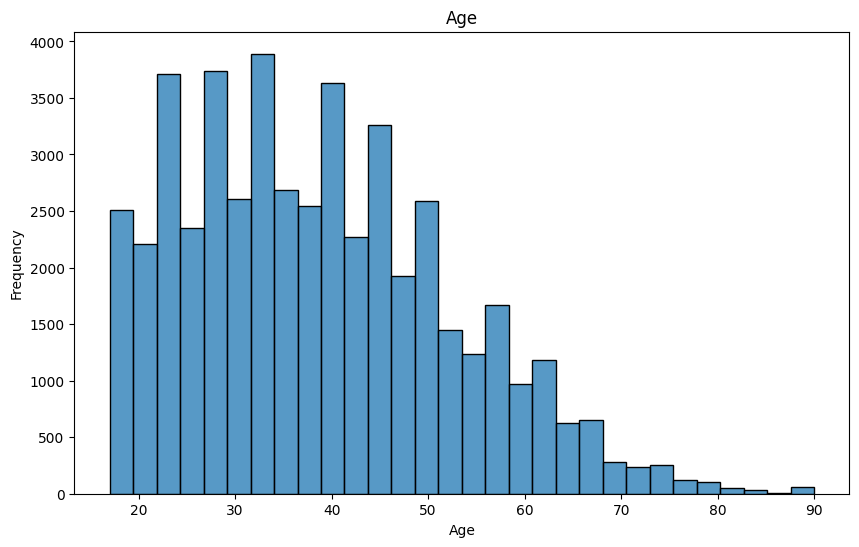

In [63]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

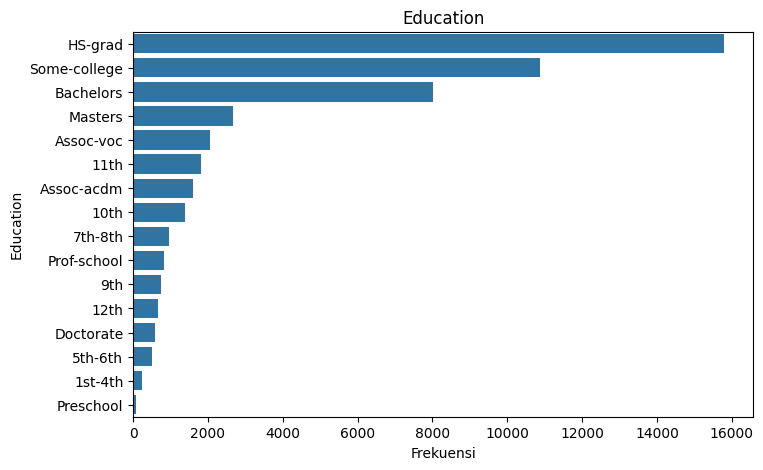

In [62]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(8, 5))
sns.countplot(y=df['education'], order = df['education'].value_counts().index)
plt.xlabel('Frekuensi')
plt.ylabel('Education')
plt.title('Education')
plt.show()

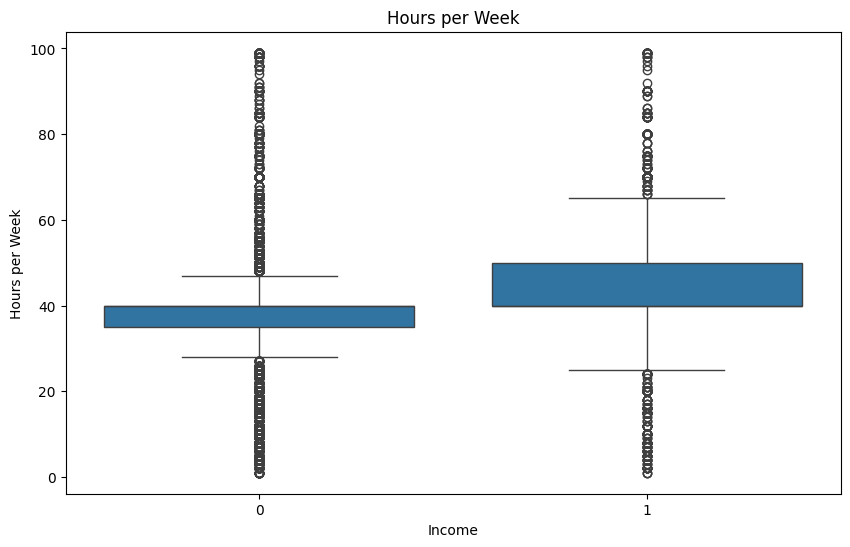

In [65]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

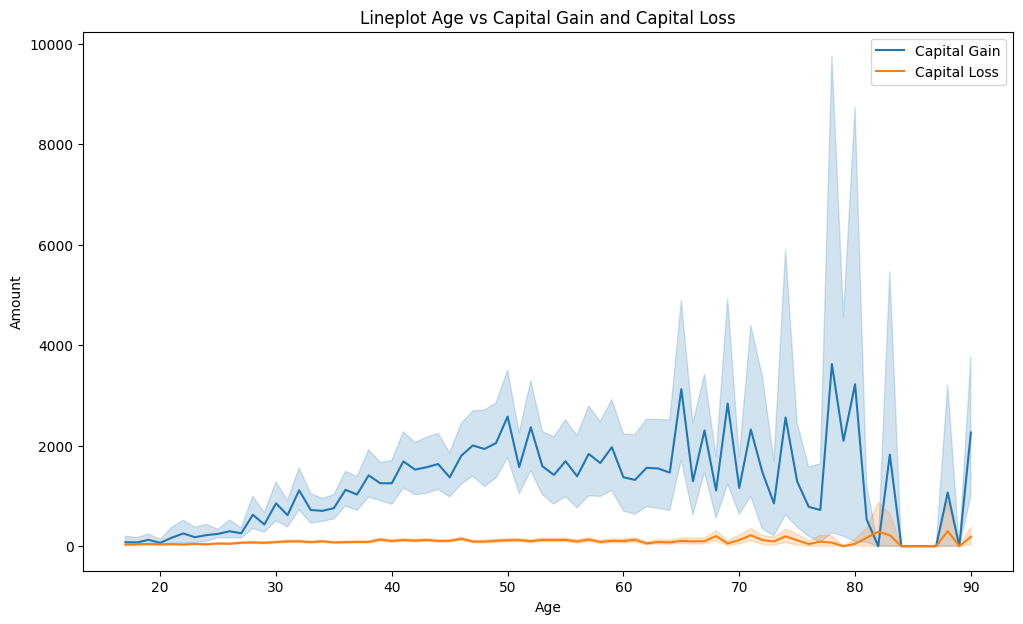

In [52]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='age', y='capital-gain', label='Capital Gain')
sns.lineplot(data=df, x='age', y='capital-loss', label='Capital Loss')
plt.title('Lineplot Age vs Capital Gain and Capital Loss')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [53]:
# Jawab dengan komentar python

'''
1.  **Fenomena pada Distribusi Umur (Age):**
    Distribusi data 'age' menunjukkan **right-skewed** (condong ke kanan). Ini berarti sebagian besar individu dalam dataset berada pada rentang usia muda hingga paruh baya (sekitar 20-50 tahun), dengan jumlah individu yang lebih tua menurun secara bertahap. Puncak distribusi berada di sekitar usia 30-40 tahun.

2.  **Strategi Imputasi untuk 'age':**
    Jika terdapat data yang hilang pada variabel 'age', strategi yang paling sesuai adalah menggunakan **median** untuk imputasi.
    **Alasan:** Karena distribusi data 'age' adalah skewed (tidak simetris), median lebih robust terhadap outlier dibandingkan dengan mean (rata-rata). Menggunakan mean akan menarik nilai imputasi ke arah ekor distribusi yang panjang, yang bisa jadi tidak representatif.

3.  **Jumlah Outlier pada 'hours-per-week':**
    Untuk menghitung jumlah outlier, kita bisa menggunakan metode IQR (Interquartile Range).
'''

# Perhitungan Outlier
Q1_less = df[df['income'] == '<=50K']['hours-per-week'].quantile(0.25)
Q3_less = df[df['income'] == '<=50K']['hours-per-week'].quantile(0.75)
IQR_less = Q3_less - Q1_less
outliers_less = df[(df['income'] == '<=50K') & ((df['hours-per-week'] < (Q1_less - 1.5 * IQR_less)) | (df['hours-per-week'] > (Q3_less + 1.5 * IQR_less)))]

Q1_more = df[df['income'] == '>50K']['hours-per-week'].quantile(0.25)
Q3_more = df[df['income'] == '>50K']['hours-per-week'].quantile(0.75)
IQR_more = Q3_more - Q1_more
outliers_more = df[(df['income'] == '>50K') & ((df['hours-per-week'] < (Q1_more - 1.5 * IQR_more)) | (df['hours-per-week'] > (Q3_more + 1.5 * IQR_more)))]

print(f"Jumlah outlier pada kategori income '<=50K': {len(outliers_less)}")
print(f"Jumlah outlier pada kategori income '>50K': {len(outliers_more)}")

Jumlah outlier pada kategori income '<=50K': 11706
Jumlah outlier pada kategori income '>50K': 781


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [66]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Import
from sklearn.preprocessing import LabelEncoder

# Encode sex
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

# Encode income
le_income = LabelEncoder()
df['income'] = le_income.fit_transform(df['income'])

# Cek hasil
print(df[['sex', 'income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


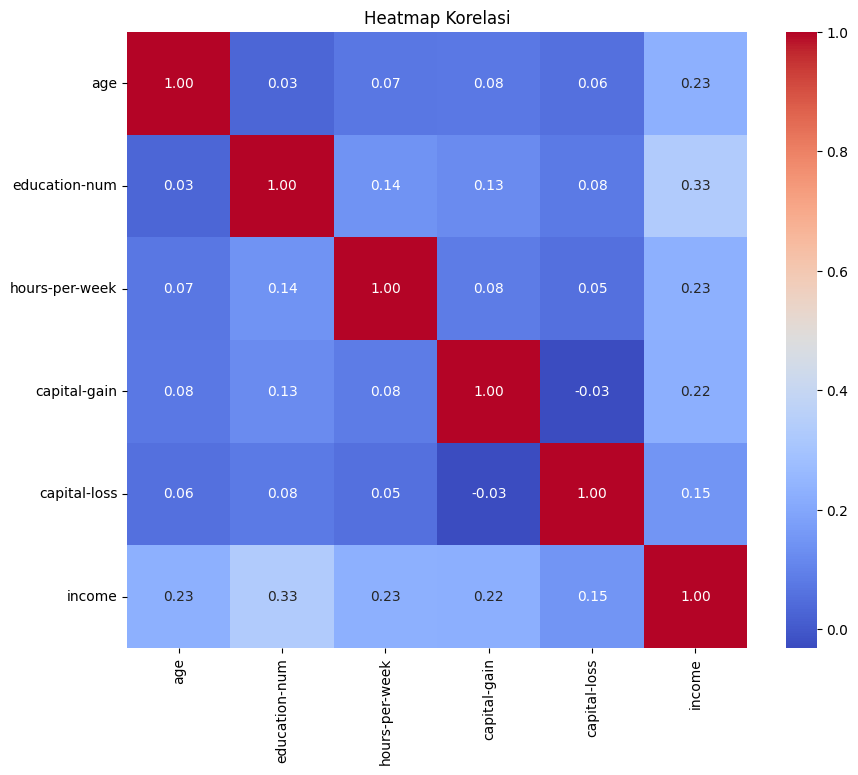

In [55]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Pilih kolom yang akan dianalisis dan hitung matriks korelasinya
kol_corr = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

# Hitung korelasi
corr_matrix = df[kol_corr].corr()

# Tampilkan hasil korelasi
print(corr_matrix)

# Tampilkan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
2. Interpretasi Hasil Korelasi:

Berdasarkan heatmap korelasi, terutama pada variabel income, diperoleh beberapa temuan:

* Hubungan Positif dengan Income:
- education-num (0.33): Menunjukkan korelasi positif dengan kekuatan sedang. Artinya, semakin tinggi tingkat pendidikan yang dimiliki, semakin besar peluang seseorang memiliki pendapatan >50K.
- hours-per-week (0.23): Memiliki hubungan positif. Individu yang bekerja lebih banyak jam setiap minggu cenderung memperoleh penghasilan lebih besar.
- age (0.23): Korelasinya positif. Semakin bertambah usia, kecenderungan untuk berpenghasilan lebih tinggi juga meningkat.
- capital-gain (0.22): Hubungannya positif. Semakin besar keuntungan modal, semakin tinggi pula kemungkinan seseorang berada pada kelompok pendapatan tinggi.

* Hubungan Negatif/ Lemah dengan Income:
- capital-loss (0.15): Walaupun bernilai positif, kekuatan korelasinya sangat lemah. Hal ini menandakan bahwa kerugian modal tidak memiliki pengaruh signifikan terhadap pendapatan dalam data ini.

* Kesimpulan:
- Variabel dengan pengaruh linear paling kuat terhadap income adalah education-num. Selain itu, faktor age, hours-per-week, dan capital-gain juga menunjukkan kontribusi positif meskipun tidak sebesar pendidikan. Temuan ini mengindikasikan bahwa pendidikan, pengalaman kerja (diwakili usia), dan intensitas jam kerja merupakan aspek penting yang berperan dalam menentukan tingkat penghasilan seseorang.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [57]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


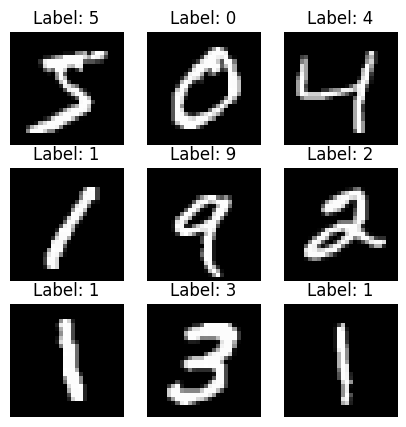

In [58]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

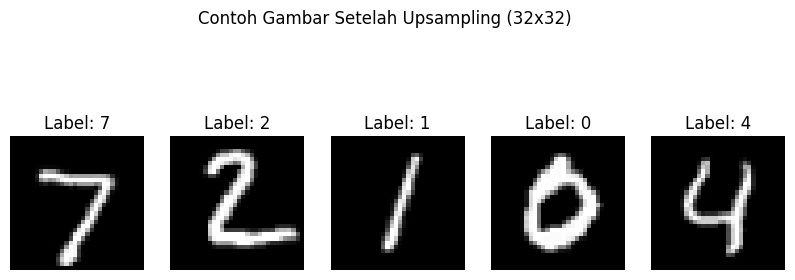

Ukuran data test setelah di-resize: (10000, 32, 32)


In [59]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# Upsampling citra
X_test_resized = []
for i in range(X_test.shape[0]):
    resized_img = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)
    X_test_resized.append(resized_img)

X_test_resized = np.array(X_test_resized)

# Tampilkan 5 data hasil upsampling
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_resized[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.suptitle('Contoh Gambar Setelah Upsampling (32x32)')
plt.show()

print("Ukuran data test setelah di-resize:", X_test_resized.shape)

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [60]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Normalisasi data
X_test_normalized = X_test_resized / 255.0

# Cek rentang nilai setelah normalisasi
print(f"Nilai piksel minimum: {X_test_normalized.min()}")
print(f"Nilai piksel maksimum: {X_test_normalized.max()}")

Nilai piksel minimum: 0.0
Nilai piksel maksimum: 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [61]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# # Flatten gambar
n_samples = X_test_normalized.shape[0]
X_test_flattened = X_test_normalized.reshape(n_samples, -1)

# Tampilkan ukuran array setelah di-flatten
print(f"Ukuran data test sebelum di-flatten:", X_test_normalized.shape)
print("Ukuran data test setelah di-flatten:", X_test_flattened.shape)

Ukuran data test sebelum di-flatten: (10000, 32, 32)
Ukuran data test setelah di-flatten: (10000, 1024)
